In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as img
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from google_drive_downloader import GoogleDriveDownloader as gdd
import warnings

In [2]:
# Get data from the web
if not os.path.isdir('./download'):
    os.mkdir('./download')
else:
    pass

download_path = os.getcwd()+'/download/DATA.zip'

if not os.path.isdir('./download/DATA/cell_images'):
    gdd.download_file_from_google_drive(file_id='14J95ET77Jh-XQBiIUOjb3lTZripBy4gz', dest_path=download_path, showsize=True, 
                                    overwrite=True, unzip=True)
else:
    print("Data directory already exists. Hence not downloading data")

Data directory already exists. Hence not downloading data


In [3]:
data_dir = os.getcwd()+'/download/DATA/cell_images'
train_path = data_dir+'/train'
test_path = data_dir+'/test'

In [4]:
print("Directories in train folder: {}".format(os.listdir(train_path)))
print("Directories in test folder: {}".format(os.listdir(test_path)))

Directories in train folder: ['parasitized', 'uninfected']
Directories in test folder: ['parasitized', 'uninfected']


In [5]:
for path in [train_path, test_path]:
    for folder in ['parasitized', 'uninfected']:
        print("Path: {} \nNumber of images: {}".format(path+'/'+folder, len(os.listdir(path+'/'+folder))))

Path: /home/ghubro/github/Playing-with-Neural-Networks/download/DATA/cell_images/train/parasitized 
Number of images: 12479
Path: /home/ghubro/github/Playing-with-Neural-Networks/download/DATA/cell_images/train/uninfected 
Number of images: 12479
Path: /home/ghubro/github/Playing-with-Neural-Networks/download/DATA/cell_images/test/parasitized 
Number of images: 1300
Path: /home/ghubro/github/Playing-with-Neural-Networks/download/DATA/cell_images/test/uninfected 
Number of images: 1300


In [6]:
os.listdir(train_path+'/parasitized')[:5]

['C168P129ThinF_IMG_20151118_161940_cell_159.png',
 'C68P29N_ThinF_IMG_20150819_134712_cell_14.png',
 'C108P69ThinF_IMG_20150924_224616_cell_195.png',
 'C189P150ThinF_IMG_20151203_142224_cell_86.png',
 'C48P9thinF_IMG_20150721_161243_cell_152.png']

In [7]:
para_cell = train_path+"/parasitized"+"/C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [8]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [9]:
imread(para_cell).shape

(148, 142, 3)

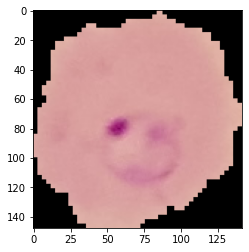

In [10]:
plt.imshow(imread(para_cell))

In [11]:
os.listdir(train_path+"/uninfected")[:5]

['C241NThinF_IMG_20151207_124643_cell_136.png',
 'C157P118ThinF_IMG_20151115_163759_cell_46.png',
 'C93P54ThinF_IMG_20150821_163640_cell_95.png',
 'C119P80ThinF_IMG_20151002_124304_cell_45.png',
 'C136P97ThinF_IMG_20151005_143743_cell_42.png']

In [12]:
uninfected_cell = train_path+"/uninfected"+"/C1_thinF_IMG_20150604_104722_cell_115.png"

In [13]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
imread(uninfected_cell).shape

(115, 133, 3)

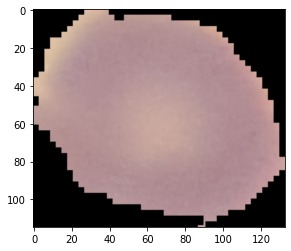

In [15]:
plt.imshow(imread(uninfected_cell))

In [16]:
# Number of training images
print("Paraticized: {}".format(len(os.listdir(train_path+"/parasitized"))))
print("Uninfected: {}".format(len(os.listdir(train_path+"/uninfected"))))

Paraticized: 12479
Uninfected: 12479


In [17]:
# Number of test images
print("Paraticized: {}".format(len(os.listdir(test_path+"/parasitized"))))
print("Uninfected: {}".format(len(os.listdir(test_path+"/uninfected"))))

Paraticized: 1300
Uninfected: 1300


In [18]:
# Calculate average dimensions of training files
width = []
height = []

for image_file in os.listdir(train_path+"/parasitized"):
    if image_file.endswith(".png"):
        image = imread(train_path+"/parasitized/"+image_file)
        dim1, dim2, color_channels = image.shape
        width.append(dim1)
        height.append(dim2)

print("Mean width of paracitized images: {}".format(np.mean(width)))
print("Mean height of paracitized images: {}".format(np.mean(height)))

Mean width of paracitized images: 134.360205144643
Mean height of paracitized images: 133.66447632021797


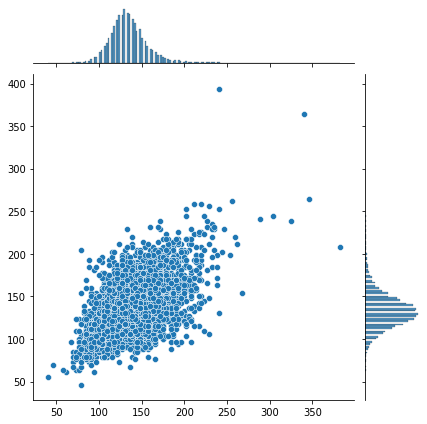

In [19]:
sns.jointplot(x=width, y=height)

In [20]:
width = []
height = []

for image_file in os.listdir(train_path+"/uninfected"):
    if image_file.endswith(".png"):
        image = imread(train_path+"/uninfected/"+image_file)
        dim1, dim2, color_channels = image.shape
        width.append(dim1)
        height.append(dim2)

print("Mean width of uninfected images: {}".format(np.mean(width)))
print("Mean height of uninfected images: {}".format(np.mean(height)))

Mean width of uninfected images: 131.64820899110507
Mean height of uninfected images: 131.4041990544114


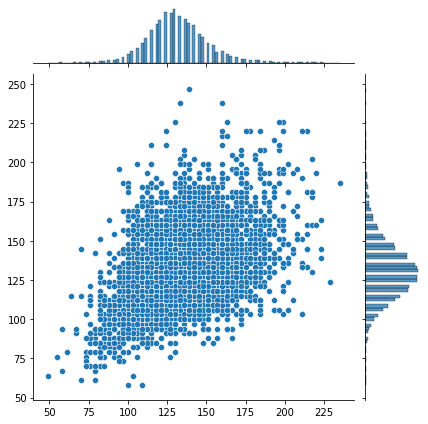

In [21]:
sns.jointplot(x=width, y=height)

In [22]:
# Calculate average dimensions of test files
width = []
height = []

for image_file in os.listdir(test_path+"/parasitized"):
    if image_file.endswith(".png"):
        image = imread(test_path+"/parasitized/"+image_file)
        dim1, dim2, color_channels = image.shape
        width.append(dim1)
        height.append(dim2)

print("Mean width of paracitized images: {}".format(np.mean(width)))
print("Mean height of paracitized images: {}".format(np.mean(height)))

Mean width of paracitized images: 134.64307692307693
Mean height of paracitized images: 133.31846153846155


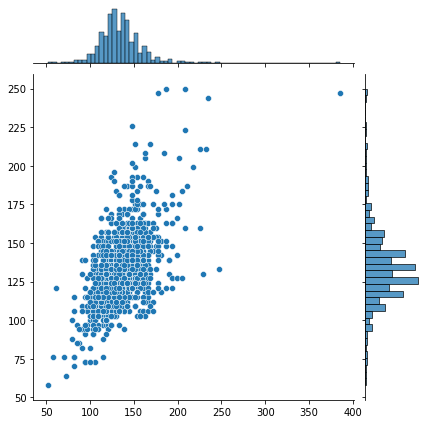

In [23]:
sns.jointplot(x=width, y=height)

In [24]:
width = []
height = []

for image_file in os.listdir(test_path+"/uninfected"):
    if image_file.endswith(".png"):
        image = imread(test_path+"/uninfected/"+image_file)
        dim1, dim2, color_channels = image.shape
        width.append(dim1)
        height.append(dim2)

print("Mean width of uninfected images: {}".format(np.mean(width)))
print("Mean height of uninfected images: {}".format(np.mean(height)))

Mean width of uninfected images: 130.92538461538462
Mean height of uninfected images: 130.75


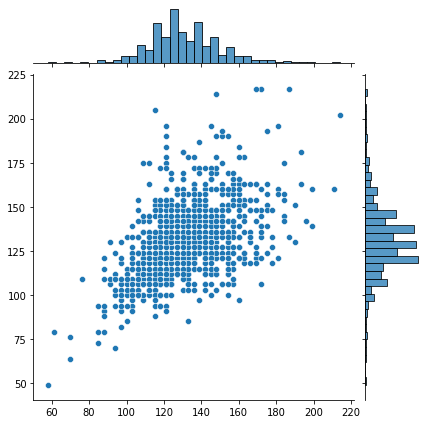

In [25]:
sns.jointplot(x=width, y=height)

In [22]:
# Define statis image shape for input files
image_shape = (130, 130, 3)

In [23]:
# Genarating image data with ImageDataGenerator
# Not normalizing because pixels are already normalized
train_image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                     zoom_range=0.1, horizontal_flip=True, fill_mode='nearest', validation_split=0.1)
test_image_gen = ImageDataGenerator()

In [24]:
# Visualize a test image
test_rara_cell_path = test_path+'/parasitized/'+os.listdir(test_path+"/parasitized")[0]

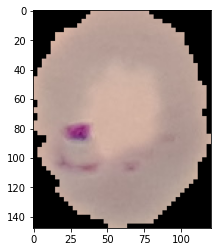

In [25]:
para_img = imread(test_rara_cell_path)
plt.imshow(para_img)

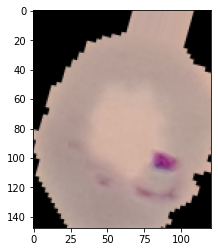

In [26]:
plt.imshow(train_image_gen.random_transform(para_img))

In [27]:
# Prepare GPU
def prep_devices():
    phy_gpus = tf.config.list_physical_devices(device_type='GPU')

    for gpu in phy_gpus:
        tf.config.experimental.set_memory_growth(device=gpu, enable=True)

    log_gpus = tf.config.list_logical_devices(device_type='GPU')
    phy_cpus = tf.config.list_physical_devices(device_type='CPU')
    log_cpus = tf.config.list_logical_devices(device_type='CPU')

    print("Physical GPUs: {}\tLogical GPUs: {}\nPhysical CPUs: {}\tLogical CPUs: {}".format(len(phy_gpus),
                                                                                             len(log_gpus),
                                                                                             len(phy_cpus),
                                                                                             len(log_cpus)))
    print("GPU:{} \nCPU:{}".format(phy_gpus, phy_cpus))

In [28]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore')
    prep_devices()

Physical GPUs: 1	Logical GPUs: 1
Physical CPUs: 1	Logical CPUs: 1
GPU:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 
CPU:[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [29]:
# Define batch size and generators
batch_size = 32
train_image_flow = train_image_gen.flow_from_directory(directory=train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size,
                                                       class_mode='binary', shuffle=True, subset="training")
val_data_flow = train_image_gen.flow_from_directory(directory=train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size,
                                                    class_mode='binary', shuffle=True, subset="validation")
test_image_flow = test_image_gen.flow_from_directory(directory=test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size,
                                                     class_mode='binary', shuffle=False)

print("Train labels:{} \nValidation labels:{} \nTest labels:{}".format(train_image_flow.class_indices, val_data_flow.class_indices, 
                                                                        test_image_flow.class_indices))

Found 22464 images belonging to 2 classes.
Found 2494 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.
Train labels:{'parasitized': 0, 'uninfected': 1} 
Validation labels:{'parasitized': 0, 'uninfected': 1} 
Test labels:{'parasitized': 0, 'uninfected': 1}


In [38]:
# Build model
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Create early stopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0

In [32]:
# Fit and train the model
with tf.device('/device:CPU:0'):
    backend.clear_session()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    results = model.fit(train_image_flow, validation_data=val_data_flow, epochs=20, callbacks=[early_stop])

Epoch 1/20
702/702 [==============================] - 174s 247ms/step - accuracy: 0.7132 - loss: 1.0960 - val_accuracy: 0.8865 - val_loss: 0.2790
Epoch 2/20
702/702 [==============================] - 173s 246ms/step - accuracy: 0.9239 - loss: 0.2212 - val_accuracy: 0.9162 - val_loss: 0.2513
Epoch 3/20
702/702 [==============================] - 174s 248ms/step - accuracy: 0.9335 - loss: 0.2004 - val_accuracy: 0.8945 - val_loss: 0.2725
Epoch 4/20
702/702 [==============================] - 175s 249ms/step - accuracy: 0.9341 - loss: 0.1958 - val_accuracy: 0.9210 - val_loss: 0.2257
Epoch 5/20
702/702 [==============================] - 175s 249ms/step - accuracy: 0.9436 - loss: 0.1773 - val_accuracy: 0.9202 - val_loss: 0.2252
Epoch 6/20
702/702 [==============================] - 174s 248ms/step - accuracy: 0.9451 - loss: 0.1802 - val_accuracy: 0.8821 - val_loss: 0.2984
Epoch 7/20
702/702 [==============================] - 176s 250ms/step - accuracy: 0.9464 - loss: 0.1774 - val_accuracy: 0.89

In [36]:
# Evaluating model performance metrics on training data CPU Metrics
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.095978,0.713230,0.278957,0.886528
1,0.221218,0.923878,0.251269,0.916199
2,0.200382,0.933494,0.272523,0.894547
3,0.195754,0.934117,0.225700,0.921010
4,0.177268,0.943599,0.225245,0.920209
5,0.180169,0.945112,0.298440,0.882117
6,0.177386,0.946359,0.339696,0.897755
7,0.173490,0.946626,0.265298,0.895349


<AxesSubplot:>

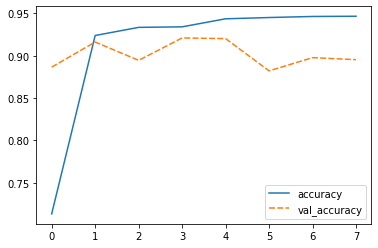

In [35]:
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [39]:
# Fit and train the model
with tf.device('/device:GPU:0'):
    backend.clear_session()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    results = model.fit(train_image_flow, validation_data=val_data_flow, epochs=20, callbacks=[early_stop])

Epoch 1/20
702/702 [==============================] - 82s 116ms/step - accuracy: 0.6491 - loss: 1.4519 - val_accuracy: 0.8713 - val_loss: 0.3620
Epoch 2/20
702/702 [==============================] - 81s 116ms/step - accuracy: 0.9235 - loss: 0.2388 - val_accuracy: 0.8573 - val_loss: 0.3080
Epoch 3/20
702/702 [==============================] - 82s 116ms/step - accuracy: 0.9340 - loss: 0.2083 - val_accuracy: 0.8805 - val_loss: 0.2805
Epoch 4/20
702/702 [==============================] - 81s 116ms/step - accuracy: 0.9405 - loss: 0.1881 - val_accuracy: 0.8617 - val_loss: 0.3063
Epoch 5/20
702/702 [==============================] - 81s 115ms/step - accuracy: 0.9427 - loss: 0.1858 - val_accuracy: 0.8749 - val_loss: 0.3154
Epoch 6/20
702/702 [==============================] - 81s 116ms/step - accuracy: 0.9448 - loss: 0.1748 - val_accuracy: 0.9114 - val_loss: 0.2363
Epoch 7/20
702/702 [==============================] - 82s 116ms/step - accuracy: 0.9476 - loss: 0.1687 - val_accuracy: 0.8974 - va

In [40]:
# Evaluating model performance metrics on training data GPU Metrics
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.451926,0.649127,0.362045,0.871291
1,0.238777,0.923478,0.307960,0.857257
2,0.208296,0.933983,0.280532,0.880513
3,0.188053,0.940483,0.306278,0.861668
4,0.185842,0.942708,0.315394,0.874900
5,0.174768,0.944801,0.236336,0.911387
6,0.168728,0.947650,0.279962,0.897354
7,0.173933,0.946537,0.213391,0.921812
8,0.172107,0.947427,0.292789,0.886127
9,0.170925,0.947293,0.338176,0.883721


<AxesSubplot:>

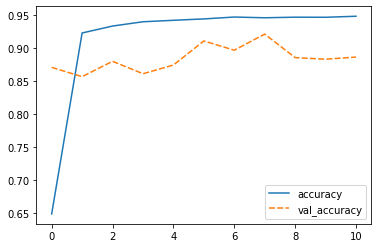

In [41]:
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [42]:
# Predict using model
pred = model.predict(test_image_flow)
print(pred)

[[1.2439388e-01]
 [3.8788512e-03]
 [5.9532793e-04]
 ...
 [9.7699451e-01]
 [9.5357382e-01]
 [9.5963365e-01]]


In [43]:
# Using cut-off value as 0.5
predictions = pred > 0.5
print(predictions)

[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [44]:
print("Classification report:\n{}".format(classification_report(y_true=test_image_flow.classes, y_pred=predictions)))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [45]:
print("Confusion Matrix:\n{}".format(confusion_matrix(y_true=test_image_flow.classes, y_pred=predictions)))

Confusion Matrix:
[[1202   98]
 [  36 1264]]


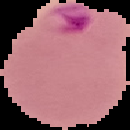

In [46]:
# Predicting for a single file
test_img = img.load_img(path=train_path+'/parasitized'+'/C99P60ThinF_IMG_20150918_141857_cell_31.png', target_size=image_shape)
test_img

In [47]:
# Pass test image to model and RESHAPE IMAGE because model expects batches of images
test_img_array = img.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)

print(model.predict(test_img_array))
predicted_class = model.predict(test_img_array) > 0.5
print(predicted_class)
print(train_image_flow.class_indices)

[[0.00011561]]
[[False]]
{'parasitized': 0, 'uninfected': 1}


In [53]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0